# Assignment 1: Electron in a finite potential well
## Yr2 Computing, 2018-2019, week 2 to 3

You are to work through the tasks, as outlined below, by working within this notebook.
By the end of the assignment you have to upload this file, containing the original content plus your answers to Canvas for marking. Note that the ** deadline ** for the assignment is different for each laboratory group. Check the Canvas pages carefully for the deadline of your assignment!

This assignment consists of a brief introduction to the problem followed by five short assessed tasks. In total, there are 20 available marks, with the number of marks available for each task indicated in the respective task's header.

Your results will be marked using a automatic script that expects your answers in a very specific format and cannot provide marks for 'almost correct' results. Make sure you follow the instructions below exactly!

***

**Before you submit the assigment**  
After completing the tasks below you must upload this file to Canvas, see the 'How to Submit' page on Canvas for further information.

It is useful to perform the following actions sometimes while you are working on the notebook, in order to catch potential problems early, rather than 5 minutes before the submission deadline.

Before you submit the notebook, you should do the following:
 * After you have completed your response to each task you should run the final cell of this notebook containing the call ```student.check()```, which will check that the naming you have used for the variables and functions in this assignment is correct.
 * Select 'Kernel->Restart & Run All' in the Jupyter menu, this will reset and restart the notebook and run all your code sequentially, similar to what marking script will do.
 * Check that no errors occured and that the results are the same you had before. If something has changes, this is usually because you might have used some in-memory values in your notebook before, that are not available when run properly. 
*** 

## The system to investigate

The aim of this assignment is to find the bound state energy eigenvalues (meaning $E < V_0$) for an electron subject to the potential: 

$$ V(x) = \begin{cases} 
      V_0 & |x| \geq \frac{a}{2} \\
      0 & |x| \lt \frac{a}{2}
   \end{cases}
$$

We will use your student ID number to customize the assessments , in this case the width $a$ and the potential $V_0$ will be set differently for each student. 

Enter your student ID in the variable studentID and execute the cell below. This will import the code for your assignment and generate and print the personalised parameters for tasks.

Then, continue to answer the outlined questions below.  


In [ ]:
# Enter your student ID here:
studentID = 1977028

# Do not alter any of the code within this cell other than the value of studentID above
from module_engine.assignment import Assignment1
student = Assignment1(studentID) 
a, V0 = student.get_parameters()

This potential with your well parameters is plotted using the code below.

D:\anaconda\lib\site-packages\matplotlib\colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
D:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


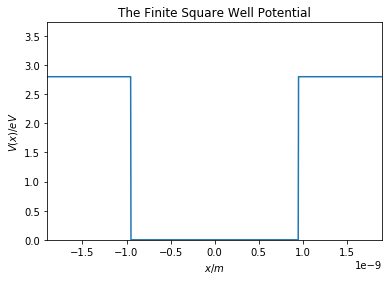

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-a, a, num=1000)
# Each point of x is mapped to V0 if abs(x) >= a / 2 and 0 otherwise
potential_array = np.piecewise(x, [abs(x) >= a / 2, abs(x) < a / 2],[V0, 0])
plt.title('The Finite Square Well Potential')
plt.xlabel(r'$x / m$')
plt.ylabel(r'$V(x) / eV$')
# np.amin and np.amax return the maximum and minimum values of an array respectively
plt.axis([np.amin(x), np.amax(x), 0, 4/3*np.amax(potential_array)])
plt.plot(x, potential_array)
plt.show()

For an electron in this potential, the parameter $x$ is related to the energy $E$ as $x=\displaystyle \frac{a}{\hbar}\sqrt{\frac{mE}{2}}$, whith $a$ the well width, $\hbar$ the reduced Planck's constant, and $m$ the mass of the electron, all in SI units. It can be shown (see Quantum Mechanics 2) that finding the energy eigenvalues reduces to finding the values of $x$ that satisfy one of the following equations:

$$\tan x = \frac{\sqrt{\lambda_0 - x^2}}{x} \quad (1)$$

$$-\cot x = \frac{\sqrt{\lambda_0 - x^2}}{x} \quad (2)$$

Where $\lambda_0 = \frac{ma^2V_0}{2\hbar^2}$ is a dimensionless constant dependent on the well parameters. Equation (1) yields energy eigenvalues whose wavefunctions are even, whilst equation (2) corresponds to the energies of odd wavefunctions.

These equations are transcendental and numerical methods must be employed to obtain the solutions. Here we utilise the ```bisect``` method available in the SciPy library, and can be loaded from the `scipy.optimize` module. We have provided a simple example for using the `bisect` methos in the example notebook ```scipy_bisect_example.ipynb```.

## Task 1
#### Marks available: 2
The first task is to define a function named `rhs(x)`, describing the right hand side of equations $(1)$ and $(2)$. The function should expect **one** argument, `x`, which is to be a NumPy array. It should then return a NumPy array containing the result of
$$\frac{\sqrt{\lambda_0 - x^2}}{x}$$
applied elementwise to `x`. 

The dimensionless constant $\lambda_0$ is defined using your well parameters in the cell below. Be sure to reference this value in your `rhs` function.

Note: NumPy has already been imported as `np` in the second code cell.

In [48]:
# Import the necessary constants from scipy.constants module
from scipy import constants
e = constants.e # Elementary Charge
hbar = constants.hbar # Reduced Planck's constant
m = constants.m_e # Electron mass

# Do not alter this constant below
lambda_0 = (m*(a**2)*V0*e)/(2*constants.hbar**2) 

# Write your rhs function here
def rhs(x):
    return np.sqrt(lambda_0-x*x)/x


This `rhs` function will be useful throughout this assignment and so it is worth checking that it behaves suitably. For example, a numpy array in the form `[1,2]` should be returned when you call your function with  
`np.array([np.sqrt(lambda_0/2),np.sqrt(lambda_0/5)])` 
as an argument.

In [50]:
# Check your rhs function before proceeding
rhs(  np.array([np.sqrt(lambda_0/2),np.sqrt(lambda_0/5)])  )

array([1., 2.])

## Task 2
#### Marks available: 7

In order to perform the bisection method, we require an interval which is known to contain a solution. Choosing this interval is straightforward if the relevant functions are represented graphically. This motivates this next task. 

In the following cell, use `matplotlib.pyplot` (already imported as `plt`) to plot the following three functions
 * $\tan x$ 
 * $\displaystyle \frac{\sqrt{\lambda_0 - x^2}}{x}$ 
 * $-\cot x$ 
 
on the **half-open** interval $\big[0.1,\sqrt\lambda_0\big)$, with at least 100 points. You must add your plots to the figure object provided, `student_figure`, with all three functions appearing on the same axes. You should ensure that your plot has a title, legend and labelled axes. 

***
This is a good example for the need to follow the instructions exactly to get full marks. The task explicitly states an 'half-open' interval. If you simple define your range as:<br>
```python
x = np.linspace(0.1, np.sqrt(lambda_0), 200)
```
you will get a closed interval and the marking script will mark you down.
Instead you should use the following code:<br>
```python
x = np.linspace(0.1, np.sqrt(lambda_0), 200, endpoint=False)
```
To catch potential issues like this, check your data and results (in this case the end point of x), and use online help pages to find the right code.
***

Limiting the range of values displayed on your $y$ axis is recommended in order that you can discern suitable intervals upon which to perform the bisection method (task 4).

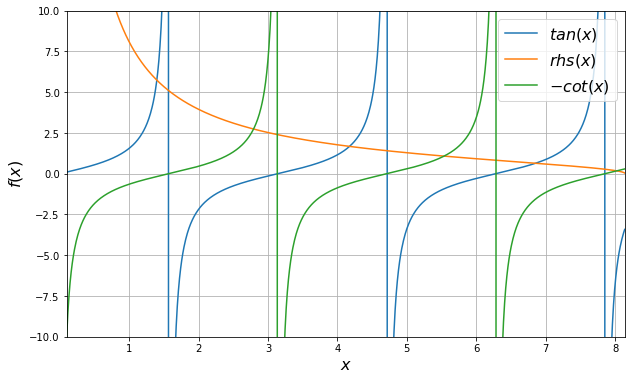

In [59]:
# For this task it can be useful to try interactive plot windows 
# to zoom in on the crossing points

# Make sure to use the figure object created in the next line, 
# because the marking script will assess it by name
student_figure = plt.figure(figsize=(10,6)) 
# You can now just add to and change this object by using plt.xxx function as
# usual.

# Add your code to plot onto student_figure here
x = np.linspace(0.1,np.sqrt(lambda_0),1000, endpoint = False) 
plt.xlabel(r'$x$', fontsize=16) 
plt.ylabel(r'$f(x)$', fontsize=16) 
# Surround a matplotlib text string with $ to render with mathtext 
# (r marks a raw string literal (special characters need not be escaped)
plt.axis([np.amin(x), np.amax(x), -10, 10]) 
plt.plot(x, np.tan(x), label=r'$tan(x)$') 
plt.plot(x, rhs(x), label=r'$rhs(x)$')
plt.plot(x, -(1.0/np.tan(x)), label=r'$-cot(x)$') 
plt.legend(fontsize=16)
plt.grid(True)
plt.show() # Display the current figure 



## Task 3
#### Marks available: 4
Next, define two more functions called `even_equation` and `odd equation`. These should each take a NumPy array as their only argument and return a NumPy array containing the result of
$$\tan x - \frac{\sqrt{\lambda_0 - x^2}}{x} \quad \text{(even_equation)}$$
and
$$\cot x + \frac{\sqrt{\lambda_0 - x^2}}{x} \quad \text{(odd_equation)}$$
applied elementwise to the input array.

In [63]:
# Write the two required functions here.
def even_equation(x):
    return np.tan(x)-np.sqrt(lambda_0-x*x)/x

def odd_equation(x):
    return 1.0/np.tan(x)+np.sqrt(lambda_0-x*x)/x


## Task 4
#### Marks available: 4
In the tasks above we used Numpy arrays for storing values and results. Numpy arrays are the data format we recommend for most use cases. However, sometimes you want to or have to use Python lists instead. Therefore  **the next two tasks require that you use Python lists** (you will not get marks if you use an array instead).

Employing the `even_equation` and `odd_equation` functions defined in task 3, and making multiple calls to the `bisect` method on suitable intervals, find the 3 smallest solutions of equations $(1)$ and $(2)$ taken together. In other words, find the values of $x$ corresponding to the first 3 energy eigenvalues. 

Append these solutions in ascending order to the empty Python list `solution_list` defined below (so that `solution_list[0]` is the smallest $x$ solution and `solution_list[2]` the third smallest).

Do not round or truncate these values.

In [88]:
# Importing scipy.optimize as optimize. This command will print an 
# Import Warning for some people, which can be safely ignored
import scipy.optimize as optimize

# Append your solutions to this list, which should be sorted in ascending order
solution_list = [] 

# Write code to generate solutions and append to solution_list here
# calling biset twice to find both roots.
first_root = optimize.bisect(even_equation, 1.25, 1.45)
second_root = optimize.bisect(odd_equation, 2.5, 3.0)
third_root = optimize.bisect(even_equation, 4.0, 4.5)
solution_list.append(first_root)
solution_list.append(second_root)
solution_list.append(third_root)
# print(solution_list)


[1.3983052182811662, 2.791818309489827, 4.174417572945458]


## Task 5
#### Marks available: 3
The final task is to write a function named `find_energy` which takes the **previously generated, ordered list** of $x$ solutions as a parameter. It should return a new list containing the 3 desired energy eigenvalues in $eV$. These are again to be in ascending order, but now each element should be a formatted **string** which retains **$3$ decimal places.**
***
The term '3 decimal places' refers to the number of digits behind the dot. This should include zeros as well. Examples for this formatting are:<br>
12.223<br>
-10.000<br>
0.500<br>
***

Note: You should make use of the constants defined in task 1.

In [83]:
# Write the function find_energy here
def find_energy(x):
    ret = []
    for i in x:
        ret.append(i*i*hbar*hbar/a/a*2/m)
    return ret



As a check, the following loop should print the three values of energy with the specified formatting:

In [93]:
energy_solutions = find_energy(solution_list)

for i, energy in enumerate(energy_solutions):
    print('Energy Eigenvalue {} is E = {:.3f}e-20 eV'.format(i, energy*pow(10,20)))

Energy Eigenvalue 0 is E = 1.322e-20 eV
Energy Eigenvalue 1 is E = 5.270e-20 eV
Energy Eigenvalue 2 is E = 11.781e-20 eV


Please execute the following statement before submitting your work. It will check that you have used correct naming for the variables and functions specified in the above tasks. It will not tell you whether you have correctly defined and implemented these! You may execute this statement as many times as required.

In [94]:
student.check()

rhs function is correctly named.
even_equation function is correctly named.
odd_equation function is correctly named.
find_energy function is correctly named.
solution_list variable is correctly named.


Before you submit, select 'Kernel->Restart & Run All' in the Jupyter menu, this will reset and restart the notebook and run all your code sequentially, similar to what marking script will do